<a href="https://colab.research.google.com/github/vinayprajapat01201/Tmdb-Movies-dataset-EDA/blob/main/TMDB_5000_MOVIES_DATASET_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: TMDB Movie Dataset - Movie Recommeder

## Introduction: 

TMDB Movie dataset is a 5000 movie description dataset, contains of several thousand films data, like popularity plot, cast, crew, budget, and revenues etc. This dataset helping us predicting which films will be highly rated, whether or not they are a commercial success in future. 

The datasets columns are: id, imdb_id, homepage, tagline, overview, cast, keywords, release_date, original_title, popularity, budget, revenue, director, runtime, genres, production_companies,vote_count, vote_average,release_year,budget_adj, revenue_adj.


#  Import libraries
#### Importing libraries required for eda and visulaisation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


# # Understanding the data
#### We'll start by exploring the data, its shape, size, features, types of values in rows and columns,etc to get the basic understanding of the dataset

In [ ]:
data= pd.read_csv('tmdb_5000_movies.csv')

#printing some values of the dataset with columns and rows to get familiar with the data

data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#printing the shape of the dataset we loaded
data.shape

(4803, 20)

In [ ]:
#as the fields are of integer so we can perfrom numerical analaysis on it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
#summing the null values in for every feature in the dataset
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Data cleaning

In [ ]:
# Drop the data
remove = ['tagline']
data.drop(remove,inplace= True, axis=1)

In [ ]:
data.drop(['homepage'],inplace=True,axis=1)

In [ ]:
# overview with na
data['overview'].fillna('NA',inplace=True)

In [ ]:
data['release_date'].fillna('NA',inplace=True)

In [ ]:
data['runtime'].fillna(0, inplace=True)

In [ ]:
data['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [ ]:
data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [ ]:
#check for duplicate
data.duplicated().sum()

0

In [ ]:
#getting insigts for the dataset we have with describe() method, to get values like min,mak,std,etc.
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.831355,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.712156,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### Description of data shows that minimum value of budget, revenue and runtime is 0 which is inappropriate

In [ ]:
data[data['runtime']==0].value_counts().sum()

37

In [ ]:
data.drop(data[data['runtime']==0].index,inplace = True) #dropping runtime=0 rows

In [ ]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.766000e+03,4766.000000,4766.000000,4.766000e+03,4766.000000,4766.000000,4766.000000
mean,2.926622e+07,55852.963491,21.656322,8.289871e+07,107.660722,6.113366,695.550986
std,4.080183e+07,87142.846495,31.885180,1.633264e+08,20.749424,1.143996,1237.879149
min,0.000000e+00,5.000000,0.000372,0.000000e+00,14.000000,0.000000,0.000000
25%,1.000000e+06,8987.250000,4.845939,0.000000e+00,94.000000,5.600000,56.000000
50%,1.500000e+07,14447.500000,13.154411,1.957943e+07,104.000000,6.200000,239.500000
75%,4.000000e+07,57147.750000,28.537602,9.375439e+07,118.000000,6.800000,742.000000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Univariate Analysis

<AxesSubplot:>

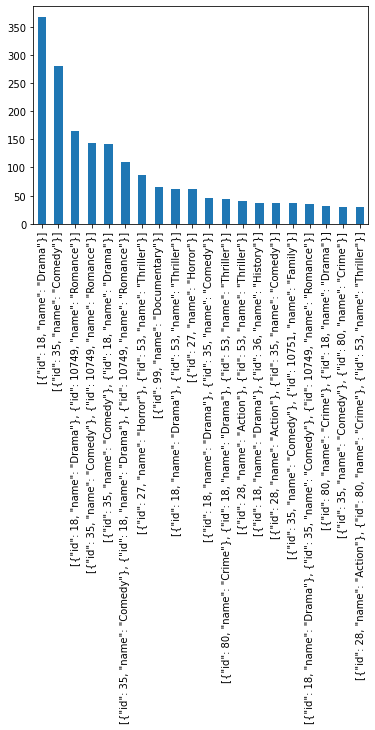

In [ ]:
data['genres'].value_counts()[0:20].plot.bar()


### Most frequent genre is 'Drama' followed by comedy and romance

In [ ]:
data['release_year']=data['release_date'].map(lambda x: x[:4])

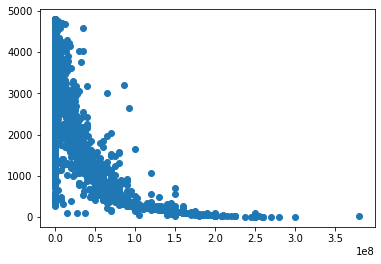

In [ ]:
plt.scatter(data['budget'],data.index)

#### High density of budget is in between 0-50 millions, therefore there are high number of low budget movie

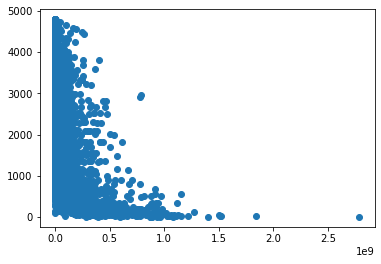

In [ ]:
plt.scatter(data['revenue'],data.index)

#### Most movies earned revenue between 0 to 250 million

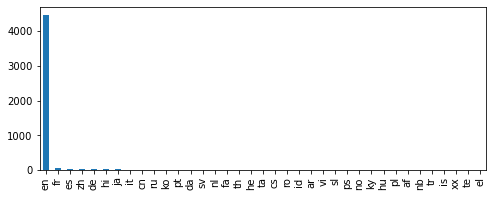

In [ ]:
plt.figure(figsize=(8,3))
data['original_language'].value_counts().plot.bar()
plt.show()

#### Highest number of movies are in english language

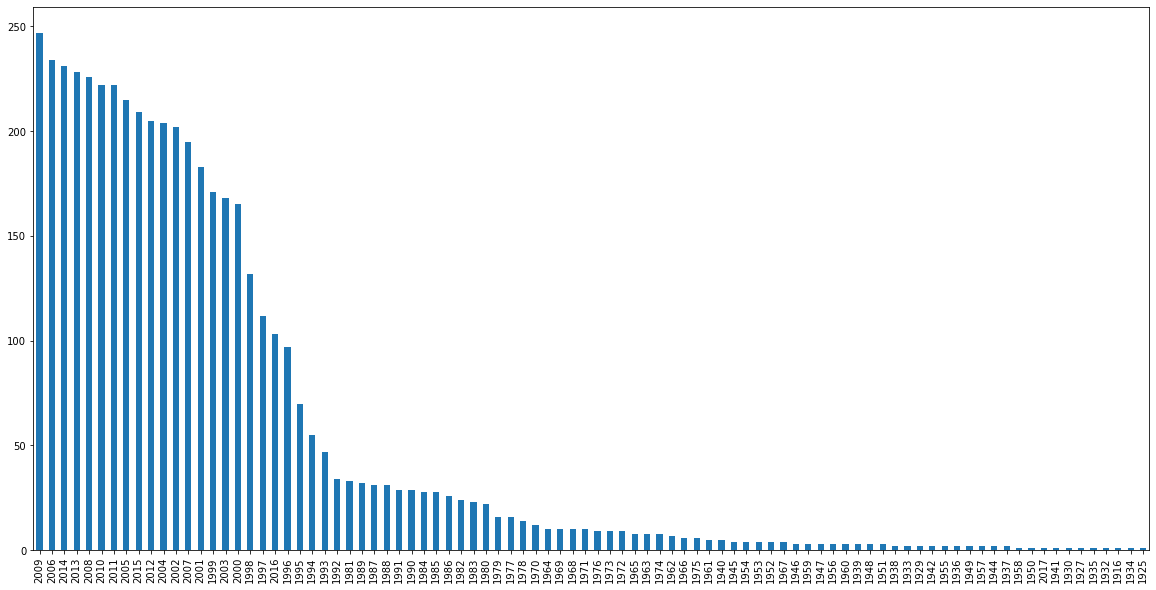

In [ ]:
plt.figure(figsize=(20,10))
data['release_year'].value_counts().plot.bar()
plt.show()

#### Year 2009 had the most number of movies released

In [ ]:
data['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

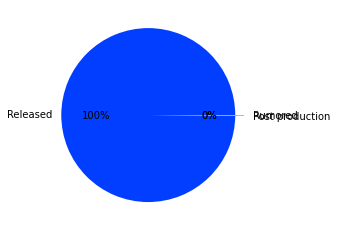

In [ ]:
palette_color = sns.color_palette('bright')
plt.pie(data["status"].value_counts(), labels=['Released','Post production', 'Rumored'], explode=[0,0.1,0.1], colors=palette_color, autopct='%.0f%%')
plt.show()

#### Greater than 99% percent of the movies in dataste are released


In [ ]:
data['budget'].max()

380000000

#### Maximum budget is 380 millions

In [ ]:
data['revenue'].max()

2787965087

#### Maximum revenue is 278 millions

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

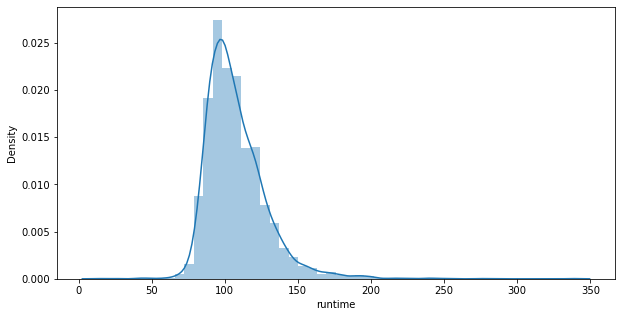

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['runtime'])

#### Most movies have a runtime between range 80 to 150

<AxesSubplot:>

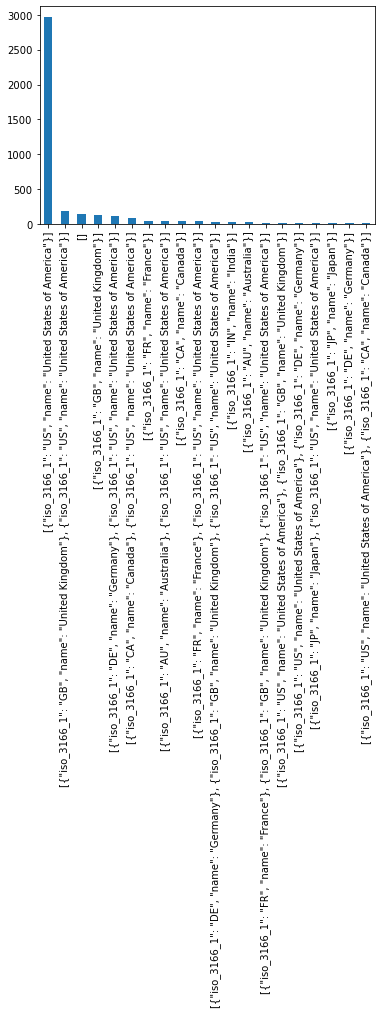

In [ ]:
data['production_countries'].value_counts()[0:20].plot.bar()

#### US has highest number of movie productions, followed by UK

## Bivariate analysis

In [ ]:
#Highest rated movies
best_10_rated = data.groupby('title')['vote_average'].agg('mean').sort_values(ascending=False).head(10)
best_10_rated = best_10_rated.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dancer, Texas Pop. 81'),
  Text(1, 0, 'Stiff Upper Lips'),
  Text(2, 0, 'Me You and Five Bucks'),
  Text(3, 0, "One Man's Hero"),
  Text(4, 0, 'There Goes My Baby'),
  Text(5, 0, 'The Shawshank Redemption'),
  Text(6, 0, 'The Godfather'),
  Text(7, 0, 'The Prisoner of Zenda'),
  Text(8, 0, 'Fight Club'),
  Text(9, 0, 'Spirited Away')])

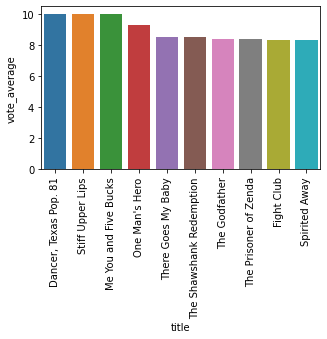

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','vote_average',data=best_10_rated)
plt.xticks(rotation=90)

#### 10 highest voted movie list has movies like god father, fight club with Stiff upper lips having highest

In [ ]:
#lowest rated movies
worst_10_rated = data.groupby('title')['vote_average'].agg('mean').sort_values(ascending=True).head(10)
worst_10_rated = worst_10_rated.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'El Rey de Najayo'),
  Text(1, 0, '8 Days'),
  Text(2, 0, 'Western Religion'),
  Text(3, 0, 'Time to Choose'),
  Text(4, 0, 'An American in Hollywood'),
  Text(5, 0, 'Heroes of Dirt'),
  Text(6, 0, 'The Algerian'),
  Text(7, 0, "Amidst the Devil's Wings"),
  Text(8, 0, 'The Ballad of Gregorio Cortez'),
  Text(9, 0, 'Her Cry: La Llorona Investigation')])

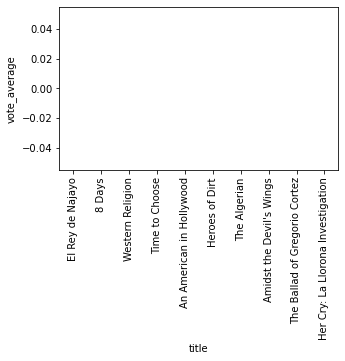

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','vote_average',data=worst_10_rated)
plt.xticks(rotation=90)

#### Some movies have 0 average votes

In [ ]:
#highest revenue movies
best_10_earned = data.groupby('title')['revenue'].agg('mean').sort_values(ascending=False).head(10)
best_10_earned = best_10_earned.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Titanic'),
  Text(2, 0, 'The Avengers'),
  Text(3, 0, 'Jurassic World'),
  Text(4, 0, 'Furious 7'),
  Text(5, 0, 'Avengers: Age of Ultron'),
  Text(6, 0, 'Frozen'),
  Text(7, 0, 'Iron Man 3'),
  Text(8, 0, 'Minions'),
  Text(9, 0, 'Captain America: Civil War')])

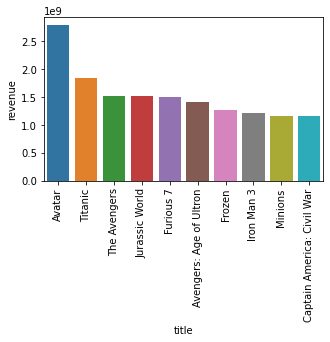

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','revenue',data=best_10_earned)
plt.xticks(rotation=90)

#### Avatar has the highest revenue of more than 2.50 billions


In [ ]:
#highest budget movies
best_10_budget = data.groupby('title')['budget'].agg('mean').sort_values(ascending=False).head(10)
best_10_budget = best_10_budget.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pirates of the Caribbean: On Stranger Tides'),
  Text(1, 0, "Pirates of the Caribbean: At World's End"),
  Text(2, 0, 'Avengers: Age of Ultron'),
  Text(3, 0, 'Superman Returns'),
  Text(4, 0, 'John Carter'),
  Text(5, 0, 'Tangled'),
  Text(6, 0, 'Spider-Man 3'),
  Text(7, 0, 'The Lone Ranger'),
  Text(8, 0, 'Harry Potter and the Half-Blood Prince'),
  Text(9, 0, 'Captain America: Civil War')])

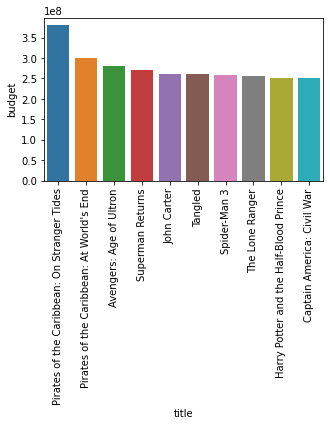

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','budget',data=best_10_budget)
plt.xticks(rotation=90)

#### The top two movies having highest budget are both of Pirates of caribbean series, 'On stranger tides' having the most 

In [ ]:
data['turnover']=data['revenue']-data['budget']

In [ ]:
#Biggest hit
best_profit = data.groupby('title')['turnover'].agg('mean').sort_values(ascending=False).head(10)
best_profit = best_profit.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Titanic'),
  Text(2, 0, 'Jurassic World'),
  Text(3, 0, 'Furious 7'),
  Text(4, 0, 'The Avengers'),
  Text(5, 0, 'Avengers: Age of Ultron'),
  Text(6, 0, 'Frozen'),
  Text(7, 0, 'Minions'),
  Text(8, 0, 'The Lord of the Rings: The Return of the King'),
  Text(9, 0, 'Iron Man 3')])

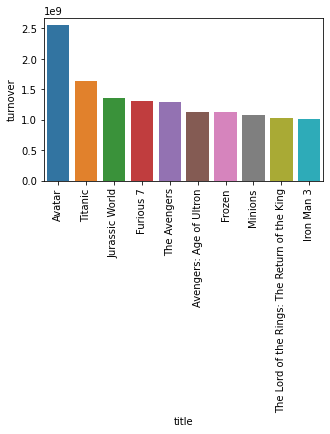

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','turnover',data=best_profit)
plt.xticks(rotation=90)

#### Avatar is the biggest with profit of approx. 2.50 millions followed by Titanic and Jurassic world

In [ ]:
#Biggest flop
worst_profit = data.groupby('title')['turnover'].agg('mean').sort_values(ascending=True).head(10)
worst_profit = worst_profit.reset_index()

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Lone Ranger'),
  Text(1, 0, 'The Wolfman'),
  Text(2, 0, 'The Alamo'),
  Text(3, 0, 'Mars Needs Moms'),
  Text(4, 0, 'Dragonball Evolution'),
  Text(5, 0, 'The 13th Warrior'),
  Text(6, 0, 'The Adventures of Pluto Nash'),
  Text(7, 0, 'Metropolis'),
  Text(8, 0, 'Mighty Joe Young'),
  Text(9, 0, 'Volcano')])

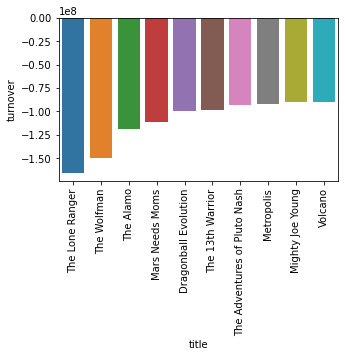

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot('title','turnover',data=worst_profit)
plt.xticks(rotation=90)

#### Biggest flop is the movie The lone ranger with loss of about 15 millions followed by The wolfman 

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='turnover', ylabel='Density'>

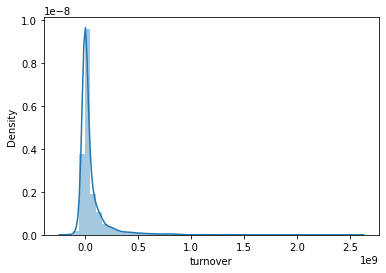

In [ ]:
sns.distplot(data['turnover'])

#### Most movies have turnover of less than 100 millions 

<AxesSubplot:>

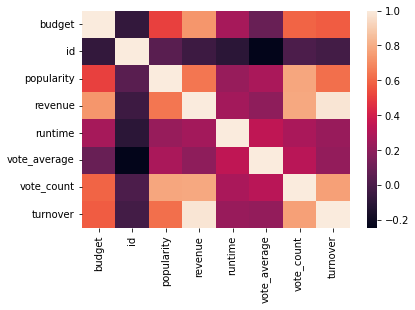

In [ ]:
sns.heatmap(data.corr())

### Insights from correlation map
        * Revenue and Profit are highly correlated
        * Popularity is directly proporational to vote count
        * Highly popular does not linearly relate to average votes
        * Budget is moderately correlated to revenue

C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


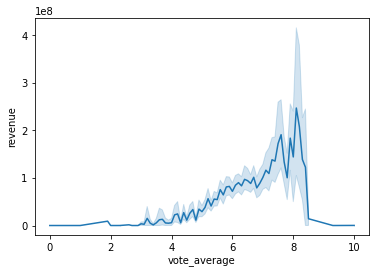

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot( 'vote_average','revenue', data=data)
plt.show()

#### As the average vote increases, there is overall increase in revenue also

## Multivarite analysis

<Figure size 240x160 with 0 Axes>

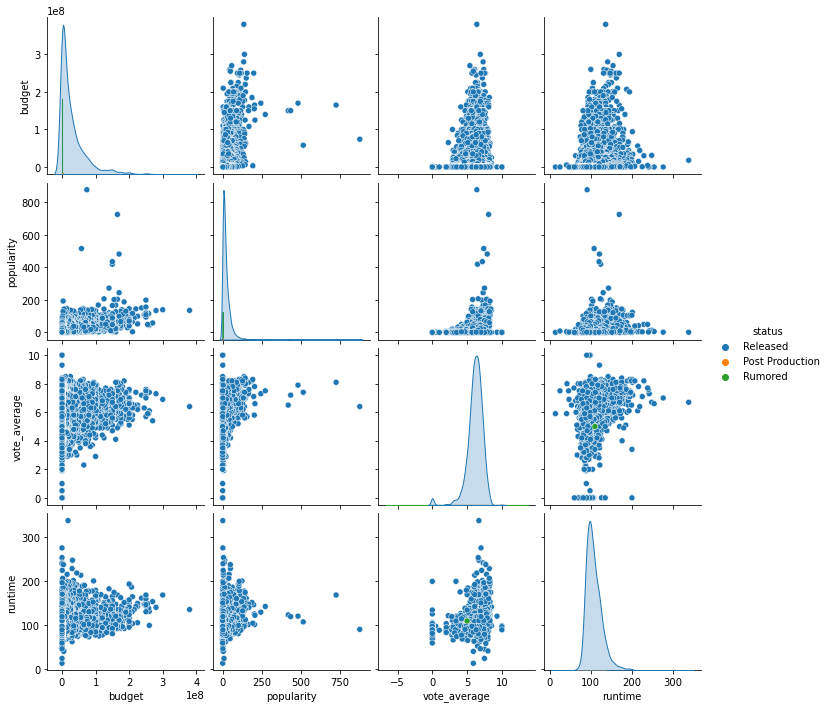

In [ ]:
plt.figure(dpi=40) #pairplot
sns.pairplot(data,x_vars=['budget', 'popularity', 'vote_average', 'runtime'], y_vars=['budget', 'popularity', 'vote_average', 'runtime'], hue='status')
plt.show()

### Insights:
        * We can clearly see that data points are not seperable linearly
        * Moderate directly proporational relation between budget and vote_count
      

<Figure size 500x400 with 0 Axes>

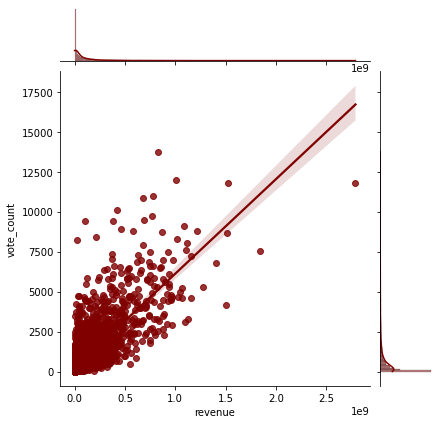

In [ ]:
plt.figure(dpi = 100, figsize = (5,4))
sns.jointplot(x = "revenue", y = 'vote_count',data = data, kind='reg', color='maroon')
plt.show()

#### Linear dependency between revenue and vote count

<Figure size 500x400 with 0 Axes>

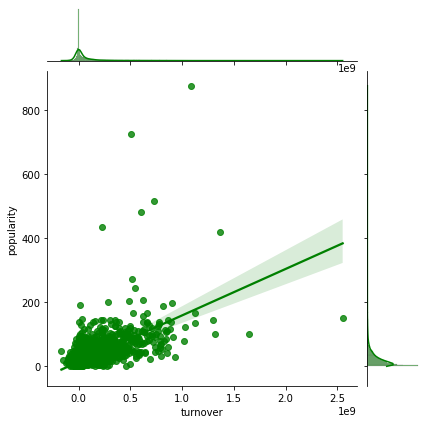

In [ ]:
plt.figure(dpi = 100, figsize = (5,4))
sns.jointplot(x = "turnover", y = 'popularity',data = data, kind='reg', color='green')
plt.show()

#### Popularity does effect the profit of a movie

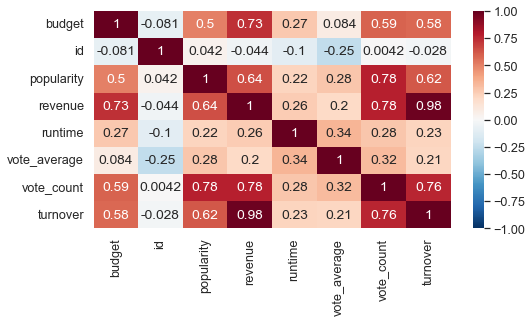

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

### Insights from correlation map
        * Revenue and Profit are highly correlated
        * Popularity and revenue are directly proporational to vote count
        * Highly popular does not linearly relate to average votes
        * Budget is moderately correlated to revenue
        * Budget has almost no relation with vote_average